## Introduction
#### This report is aimed to tidy the messy data, the data is about wine. I would tidy the data using Explanatory Data Analysis method and some python skills.

#### There are lots of chemical attribute denoting the chemical contents of the wine, and there are also some other attributes, such as, Labe Appeal is the design of the wine, while the Stars are ratings from experts, Index are wine's unique ID, Target is the sold wine.

#### First, I clean the data in use of domain knowledge development.

#### Second, I found there are lots of missing values and outliers in dataset, I impute the missing values, and fill in the outliers by medians.

#### Also, for the negative values in chemical contents, I substitue the negative values by means.

#### For STARS, which have missing values, I thought filling in missing values with zeros would be meaningful, because the missing values could be the wines which have not yet being rated by experts. I also created dummies for STARS to see more straightforward in distributions.

#### In the end, I apply log transformations to some attributes of the data.

## Data Profiling & Domain Knowledge Development
- **INDEX**: The Unique ID of wine, it assigns unique codes to different wines. It's a lot like ISBN for books. Each wine has a unique numerical code and display name which can be shared automatically.
- **AcidIndex**: Measures total acidity of wine via a weighted average.
- **Alcohol**: Alcohol Content, the percent alcohol content of the wine
- **Chlorides**: Chloride content of the wine, the amount of salt in the wine, usually wine contains from 2 to 4 g/L of salts of mineral acids.
- **CitricAcid**: Citric Acid content of the wine, found in small quantities, citric acid can add ‘freshness’ and flavor to wines
- **Density**: Density of the wine, the density of water is close to that of water depending on the percent alcohol and sugar content
- **FixedAcidity**: FixedAcidity of the wine, do not evaporate readily
- **FreeSulfurDioxide**: Sulfur Dioxide content of the wine. the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine
- **LabelAppeal**: Subjective marketing score that indicates the appeal of the design of the label on the bottle
- **ResidualSugar**: Residual sugar content of the wine, the amount of sugar remaining after fermentation stops, it’s rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet
- **STARS**: Wine rating as determined by experts (4 = excellent; 1 =Poor)
- **Sulphates**: Sulfate content of the wine, a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant
- **TotalSulfurDioxide**: Total sulfur dioxide content of the wine, amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine. The maximum allowable concentration for a bottled wine is: 350 ppm (mg/L) of TSO2.
- **VolatileAcidity**: Volatile acid content of the wine, the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste. Usually there are maximum 1.4 g/L for red wine and 1.2 g/L for white wine.
- **pH**: pH of the wine, describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale, so I will set the threshold of 2 and 5 here.

In [ ]:
#import the file and important packages
!pip install missingno
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns

import statsmodels.api as sm

import pandas as pd
data = pd.read_excel("M3_Data.xls")

## Exploratory Data Analysis (EDA) and Data Pre-processing
### To begin my data prepocessing, first I want to check what the types of data are in different features, check what are categorical variables, what are numeric variables, what type of numeric values are in numeric variables:

In [2]:
#check the types of data 
data.dtypes

INDEX                   int64
TARGET                  int64
FixedAcidity          float64
VolatileAcidity       float64
CitricAcid            float64
ResidualSugar         float64
Chlorides             float64
FreeSulfurDioxide     float64
TotalSulfurDioxide    float64
Density               float64
pH                    float64
Sulphates             float64
Alcohol               float64
LabelAppeal             int64
AcidIndex               int64
STARS                 float64
dtype: object

### After checking data types, I found there are 16 objects, which are all numeric attributes, of which 12 are float types and 4 are int types.

In [3]:
#Do a descriptive statistics check on data
data_desc = data.describe()
data_desc

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
count,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000,12179.000000,12157.000000,12148.000000,12113.000000,12795.000000,12400.000000,11585.000000,12142.000000,12795.000000,12795.000000,9436.000000
mean,8069.980305,3.029074,7.075717,0.324104,0.308413,5.418733,0.054822,30.845571,120.714233,0.994203,3.207628,0.527112,10.489236,-0.009066,7.772724,2.041755
std,4656.905107,1.926368,6.317643,0.784014,0.862080,33.749379,0.318467,148.714558,231.913211,0.026538,0.679687,0.932129,3.727819,0.891089,1.323926,0.902540
min,1.000000,0.000000,-18.100000,-2.790000,-3.240000,-127.800000,-1.171000,-555.000000,-823.000000,0.888090,0.480000,-3.130000,-4.700000,-2.000000,4.000000,1.000000
25%,4037.500000,2.000000,5.200000,0.130000,0.030000,-2.000000,-0.031000,0.000000,27.000000,0.987720,2.960000,0.280000,9.000000,-1.000000,7.000000,1.000000
50%,8110.000000,3.000000,6.900000,0.280000,0.310000,3.900000,0.046000,30.000000,123.000000,0.994490,3.200000,0.500000,10.400000,0.000000,8.000000,2.000000
75%,12106.500000,4.000000,9.500000,0.640000,0.580000,15.900000,0.153000,70.000000,208.000000,1.000515,3.470000,0.860000,12.400000,1.000000,8.000000,3.000000
max,16129.000000,8.000000,34.400000,3.680000,3.860000,141.150000,1.351000,623.000000,1057.000000,1.099240,6.130000,4.240000,26.500000,2.000000,17.000000,4.000000


### After descriptive statistic checking on data, I found:

- 1. There are 12157 counts in ResidualSugar, 12157 counts in Chlorides, 12148 counts in FreeSulfurDioxide, 12113 counts in TotalSulferDioxide, 12400 counts in pH, 11585 counts in Sulphates, 12142 counts in Alcohol, 9436 counts in STARS. From these information, I guessed that ResidualSugar has 12795 - 12157 = 638 missing values, Chlorides has 12795 - 12157 = 638 missing values, FreeSulfurDioxide has 12795 - 12148 = 647 missing values, TotalSulfurDioxide has 12795 - 12113 = 682 missing values, pH has 12795 - 12400 = 395 missing values, Sulphates has 12795 - 11585 = 1210 missing values, Alcohol has 12795 - 12142 = 653 missing values, STARS has 12795 - 9436 = 3359 missing values.

- 2. Attribute LabelAppeal's mean is a negative value, which means there might be a lot of negative values in this attribute, the min value of FixedAcidity, VolatileAcidity, CitricAcid, ResidualSugar, Chlorides, FreeSulfurDioxide, TotalSulfurDioxide, Sulphates, Alcohol and LabelAppeal are negative values, which means these attributes have negative values. The min value of INDEX, Density, pH, AcidIndex, STARS are positve, which means those attributes do not have negative values.

- 3. The min value of TARGET is 0.00, which means the TARGET are non-negative values.

- 4. 25% of ResidualSugar values are -2.00, 25% of Chlorides values are -0.031, 25% of LabelAppeal values are -1.00, which means these attributes have the most numbers of negative values.

## Eliminate invalid data using domain knowledge.

In [374]:
#remove rows that have a volatile acidity above 1.4
data=data[data.VolatileAcidity<=1.4]

#remove rows that have a total sulfur dioxide value above 350
data=data[(data.TotalSulfurDioxide<=350)]

#remove rows that have a free sulfur dioxide value above 350
data=data[(data.FreeSulfurDioxide<=350)] 

#remove rows where the free sulfur dioxide value is greater than the total sulfur dioxide value
data=data[(data.FreeSulfurDioxide<=data.TotalSulfurDioxide)] 

#remove rows that have a pH value of less than 2 or greater than 5.
data=data[((data.pH >2) & (data.pH<5))]
             
#check shape
data.shape

(5190, 16)

### Plot histograms of variables:

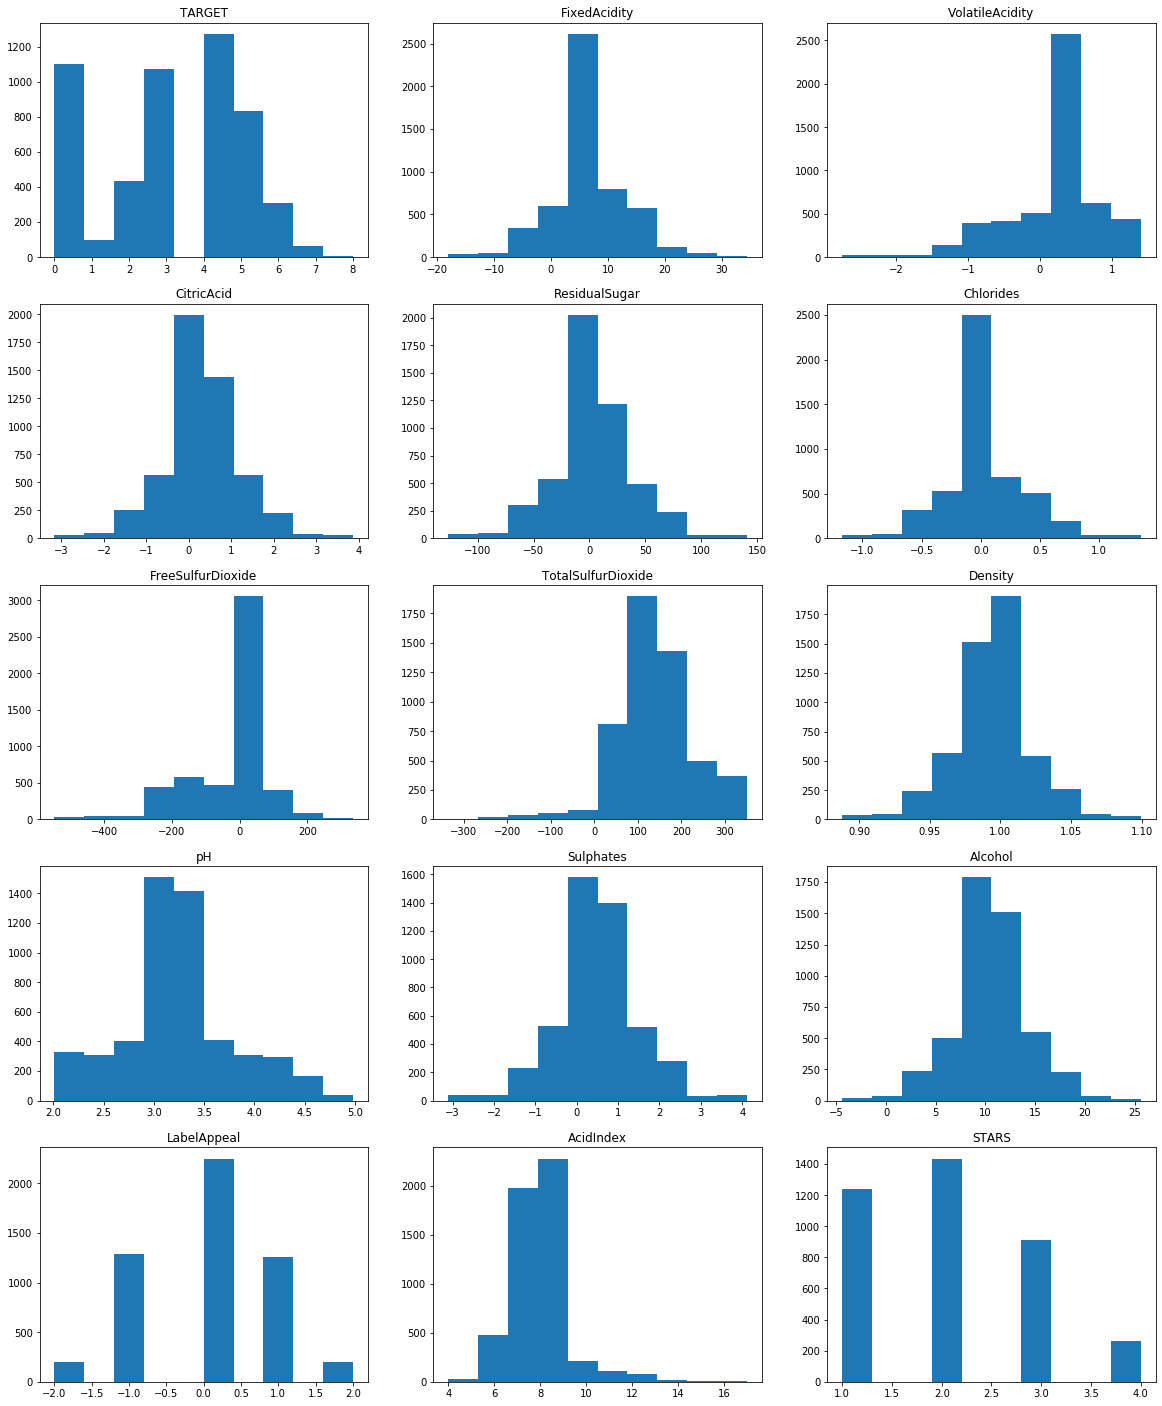

In [290]:
#define a figure to which we will add a histogram for each of our attributes, except for index
plt.figure(figsize=(20,25))

#ignore warnings
np.warnings.filterwarnings('ignore')

#use an index to identify the spot of the subplot
j=1
columns=data.columns.tolist()
for k in columns[1:] :   #for each column in the dataframe except INDEX graph a histogram 
    plt.subplot(5,3,j) 
    plt.hist(data[k])
    plt.title('%s' %k)
    j=j+1 #add 1 to go to the next subplot space

#show results    
plt.show()

### Boxplots for each of the variables as another indicator of spread.

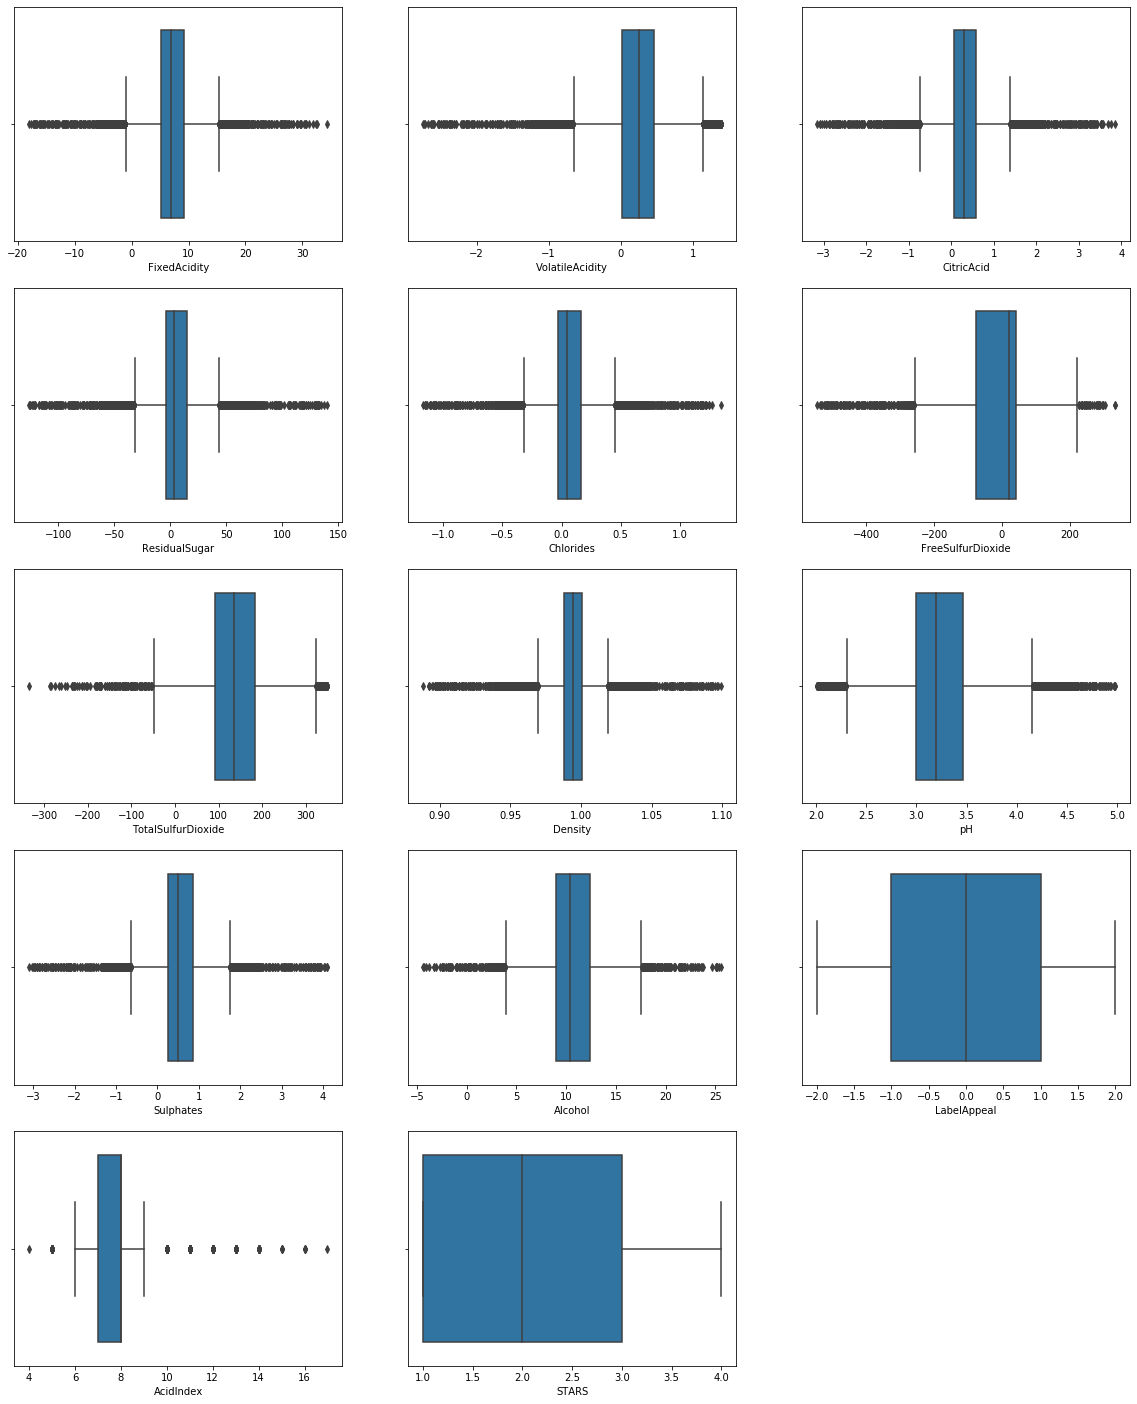

In [291]:
#define a figure to which we will add boxplots of each attribute.
plt.figure(figsize=(20,25))

#use an index to identify the spot of the subplot
j=1
columns=data.columns.tolist()
for k in columns[2:] :   #for each column in the dataframe except INDEX and TARGET
    plt.subplot(5,3,j) 
    sns.boxplot(x=k,data=data)
    j=j+1 #add 1 to go to the next subplot space

#show results
plt.show()

### Observations regarding variables: All variables have outliers

- STARS has most values concentrated in the STAR 2.0. Only a small proportion is in the STAR 4.0.
- TARGET has most values concentrated in the 4.0. Only a small proportion is in the 8.0.
- Fixed acidity, volatile acidity and citric acid, ResidualSugar, Chlorides, FreeSulfurDioxide, TotalSulfurDioxide, Density, pH and Sulphates and Alcohol have outliers. If those outliers are eliminated distribution of the variables may be taken to be symmetric.
- Some of the variables, e.g . AcidIndex, have a few outliers but is very different from the rest.
- Outliers are on the both sides.

### Conclusion till now:
- I see that Fixed Acidity, Volatile Acidity, Citric Acid, Residual Sugar, Chlorides, FreeSulfurDioxide, TotalSulfurDioxde, Density, pH, Sulphates, Alcohol, AcidIndex are approximately normally distributed.
- The distributon of AcidIndex is skewed right. Chlorides, pH and Sulphates are skewed left.

## Dealing with missing data:
### Check the proportion of missing values in each attribute:

- From the first descriptive statistic checking, I could have guessed that ResidualSugar has 12795 - 12157 = 638 missing values, Chlorides has 12795 - 12157 = 638 missing values, FreeSulfurDioxide has 12795 - 12148 = 647 missing values, TotalSulfurDioxide has 12795 - 12113 = 682 missing values, pH has 12795 - 12400 = 395 missing values, Sulphates has 12795 - 11585 = 1210 missing values, Alcohol has 12795 - 12142 = 653 missing values, STARS has 12795 - 9436 = 3359 missing values. So Let's truly checked whether my guess is right:

In [292]:
null_cols = ['ResidualSugar', 'Chlorides', 'FreeSulfurDioxide', 'TotalSulfurDioxide', 'pH', 'Sulphates', 'Alcohol','STARS']
total_rows = data.shape[0]
for each_col in null_cols:
    print('{}:{}'.format(each_col, data[pd.isnull(data[each_col])].shape[0] / total_rows))

ResidualSugar:0.046628131021194605
Chlorides:0.05394990366088632
FreeSulfurDioxide:0.0
TotalSulfurDioxide:0.0
pH:0.0
Sulphates:0.09499036608863198
Alcohol:0.0489402697495183
STARS:0.2583815028901734


- The result shows that STARS has the most proportion of missing values, amounts to 26%. After deleting rows with domain knowledge,the missing values of Free Sulfur Dioxide, Total Sulfur Dioxide and pH have been eliminated.

### Then let us check whether those missing values have correlated with other variables:

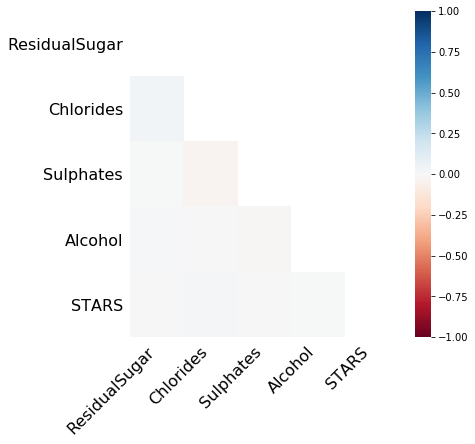

In [293]:
#graph a heat map of the missing data to see if the locations where the data are missing are correlated.
#code as referenced in O'Reilley's Machine Learning Pocket Reference
import missingno as msno
ax = msno.heatmap(data, figsize = (6,6))
ax.get_figure(); #add a ; at the end to prevent it from displaying twice

### The figure above shows the missing values have very less correlations with each other.
- Sulphates have a little correlations with Chlorides, but that is reasonable in Chemical knowledge.
- Next, I will check whether the missing values displays some patterns:

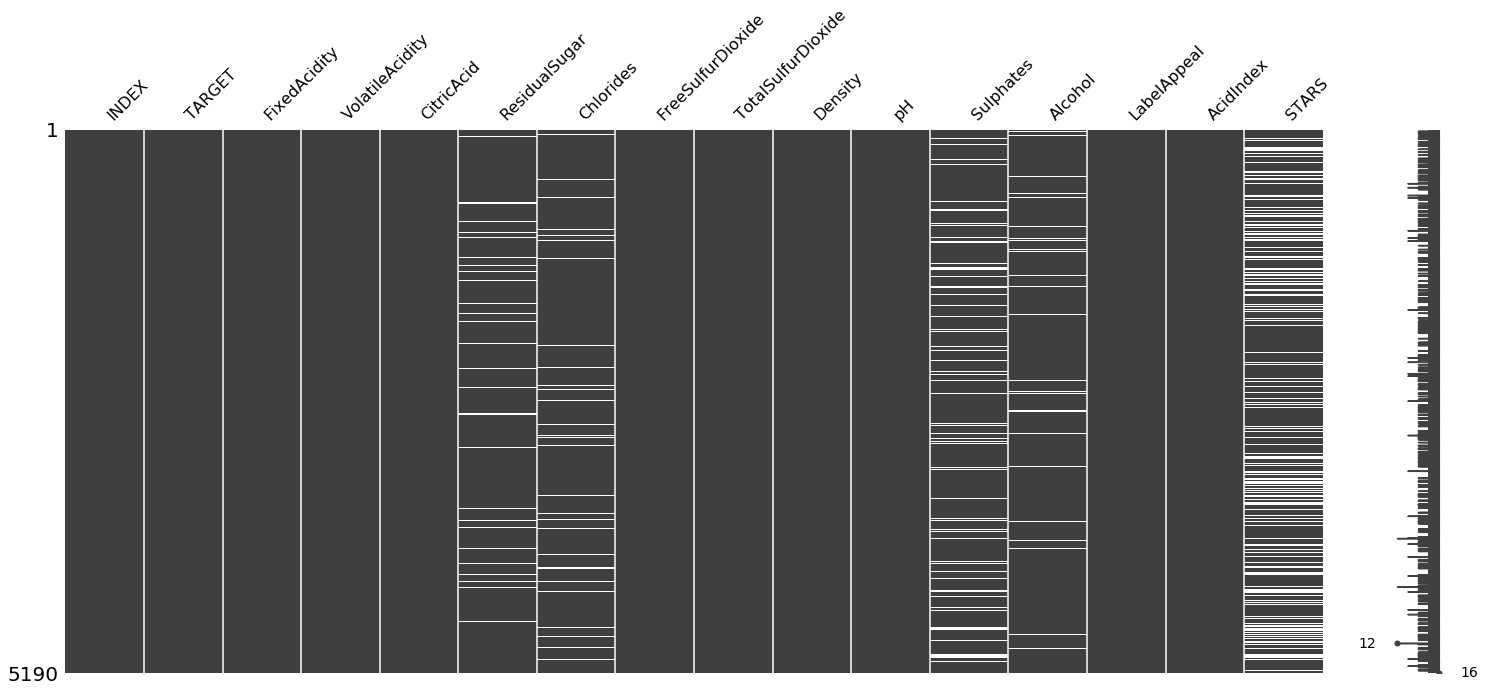

In [294]:
#use missingnos matrix to see if there is a pattern to the missing data
ax2 = msno.matrix(data)
ax2.get_figure();

### The missing data did not show any pattern, so they are randomly missing values.

Next we will impute the missing values in all the other columns using Scikit-Learn's K-Nearest-Neighbors function (KNN). We chose to use a k value of 81 as it is the square root of the sample size (6511). Since we have numerous different data types, KNN is a good choice. 

In [375]:
impute=data.iloc[:,2:].copy()
#Impute missing values of STARS with 0.0
impute['STARS']=impute['STARS'].replace(np.nan, 0)

impute2 = impute.iloc[:,2:15].copy()
from sklearn.impute import KNNImputer
#impute the values using K value of 81
imputer = KNNImputer(n_neighbors=81, weights="uniform")
imputknn=pd.DataFrame(imputer.fit_transform(impute)
                                ,columns=impute.columns.tolist())
#show results
imputknn.head()

,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,5.7,0.385,0.04,18.8,-0.425000,22.0,115.0,0.99640,2.24,1.83,6.2,-1.0,6.0,1.0
1,8.0,0.330,-1.26,9.4,0.052568,-167.0,108.0,0.99457,3.12,1.77,13.7,0.0,9.0,2.0
2,11.3,0.320,0.59,2.2,0.556000,-37.0,15.0,0.99940,3.20,1.29,15.4,0.0,11.0,0.0
3,5.5,-0.220,0.39,1.8,-0.277000,62.0,180.0,0.94724,3.09,0.75,12.6,0.0,8.0,4.0
4,7.9,0.600,0.06,50.4,0.069000,15.0,339.0,0.99640,3.30,0.46,3.9,1.0,9.0,0.0


Since the missing values of stars may also be valuable, so I will Create the dummy variables for STARS:

In [376]:
dummy_STARS = pd.get_dummies(imputknn['STARS'])
dummy_STARS.rename(columns={'STARS':'STAR1','STARS':'STAR2','STARS':'STAR3','STARS':'STAR4','STARS':'STAR5'},inplace = True)
imputknn = pd.concat([imputknn,dummy_STARS],axis = 1)
imputknn.drop('STARS',axis = 1, inplace = True)

- See what the data has changed now:

In [377]:
imputknn_desc = imputknn.describe()
imputknn_desc

,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,0.0,1.0,2.0,3.0,4.0
count,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000
mean,6.974355,0.169873,0.326484,4.910123,0.056128,-22.409249,137.757225,0.993849,3.244418,0.518129,10.542292,-0.006166,7.774952,0.258382,0.238343,0.276493,0.175915,0.050867
std,6.365187,0.639818,0.862389,33.211658,0.313977,118.276515,88.914207,0.026421,0.556783,0.902346,3.593855,0.891903,1.313255,0.437787,0.426111,0.447307,0.380785,0.219747
min,-18.000000,-2.745000,-3.160000,-126.200000,-1.171000,-546.000000,-335.000000,0.888090,2.010000,-3.100000,-4.400000,-2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.100000,0.020000,0.060000,-1.540123,-0.006000,-78.000000,91.000000,0.988027,3.000000,0.320000,9.100000,-1.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.900000,0.260000,0.310000,3.900000,0.046000,20.000000,135.000000,0.994330,3.200000,0.500000,10.404527,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.200000,0.470000,0.590000,14.487500,0.130000,42.000000,184.000000,1.000370,3.460000,0.770000,12.200000,1.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,34.400000,1.400000,3.860000,140.650000,1.351000,334.000000,350.000000,1.099240,4.980000,4.110000,25.600000,2.000000,17.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Dealing with negative values:

### There are some negative values in chemical content, which is meaningless in real life, so Let's deal with those negative values:

- Check the proportion of negative values in the data set:

In [378]:
#look at proportion of invalid negative values in the datset

data_neg = imputknn_desc[['FixedAcidity', 'VolatileAcidity', 'CitricAcid', 'ResidualSugar', 'Chlorides', 'FreeSulfurDioxide', 'TotalSulfurDioxide', 'Sulphates', 'Alcohol']]

count_neg=[]
count=0
for col in data_neg.columns:
    for i in range(len(data_neg)):
        if data_neg[col][i] < 0:
            count+=1
    count_neg.append(count)
    count=0
neg_num_df = pd.DataFrame()
neg_num_df['Column'] = ['FixedAcidity', 'VolatileAcidity', 'CitricAcid', 'ResidualSugar', 'Chlorides', 'FreeSulfurDioxide', 'TotalSulfurDioxide', 'Sulphates', 'Alcohol']
neg_num_df['Number of Negative'] = pd.DataFrame({'Number of Negative': count_neg})
neg_num_df['% of Total'] = round((neg_num_df['Number of Negative']/len(data_neg)),4)*100
neg_num_df

,Column,Number of Negative,% of Total
0,FixedAcidity,1,12.5
1,VolatileAcidity,1,12.5
2,CitricAcid,1,12.5
3,ResidualSugar,2,25.0
4,Chlorides,2,25.0
5,FreeSulfurDioxide,3,37.5
6,TotalSulfurDioxide,1,12.5
7,Sulphates,1,12.5
8,Alcohol,1,12.5


## Substitute the negative values with mean.

### After transforming, there are seldom negative values, so I will impute the negative values with mean value to avoid bias.

In [379]:
FixedAcidity = imputknn[['FixedAcidity']].mean()
imputknn['FixedAcidity'][imputknn['FixedAcidity'] < 0] = FixedAcidity
VolatileAcidity = imputknn[['VolatileAcidity']].mean()
imputknn['VolatileAcidity'][imputknn['VolatileAcidity'] < 0] = VolatileAcidity
CitricAcid = imputknn[['CitricAcid']].mean()
imputknn['CitricAcid'][imputknn['CitricAcid'] < 0] = CitricAcid
ResidualSugar = imputknn[['ResidualSugar']].mean()
imputknn['ResidualSugar'][imputknn['ResidualSugar'] < 0] = ResidualSugar
Chlorides = imputknn[['Chlorides']].mean()
imputknn['Chlorides'][imputknn['Chlorides'] < 0] = Chlorides
FreeSulfurDioxide = imputknn[['FreeSulfurDioxide']].mean()
imputknn['FreeSulfurDioxide'][imputknn['FreeSulfurDioxide'] < 0] = FreeSulfurDioxide
TotalSulfurDioxide = imputknn[['TotalSulfurDioxide']].mean()
imputknn['TotalSulfurDioxide'][imputknn['TotalSulfurDioxide'] < 0] = TotalSulfurDioxide
Sulphates = imputknn[['Sulphates']].mean()
imputknn['Sulphates'][imputknn['Sulphates'] < 0] = Sulphates
Alcohol = imputknn[['Alcohol']].mean()
imputknn['Alcohol'][imputknn['Alcohol'] < 0] = Alcohol

### Let's check whether there are negative values after imputing:

In [380]:
#look at proportion of invalid negative values in the datset

data_neg = imputknn[['FixedAcidity', 'VolatileAcidity', 'CitricAcid', 'ResidualSugar', 'Chlorides', 'FreeSulfurDioxide', 'TotalSulfurDioxide', 'Sulphates', 'Alcohol']]

count_neg=[]
count=0
for col in data_neg.columns:
    for i in range(len(data_neg)):
        if data_neg[col][i] < 0:
            count+=1
    count_neg.append(count)
    count=0
neg_num_df = pd.DataFrame()
neg_num_df['Column'] = ['FixedAcidity', 'VolatileAcidity', 'CitricAcid', 'ResidualSugar', 'Chlorides', 'FreeSulfurDioxide', 'TotalSulfurDioxide', 'Sulphates', 'Alcohol']
neg_num_df['Number of Negative'] = pd.DataFrame({'Number of Negative': count_neg})
neg_num_df['% of Total'] = round((neg_num_df['Number of Negative']/len(data_neg)),4)*100
neg_num_df

,Column,Number of Negative,% of Total
0,FixedAcidity,0,0.0
1,VolatileAcidity,0,0.0
2,CitricAcid,0,0.0
3,ResidualSugar,0,0.0
4,Chlorides,0,0.0
5,FreeSulfurDioxide,0,0.0
6,TotalSulfurDioxide,0,0.0
7,Sulphates,0,0.0
8,Alcohol,0,0.0


There are no negative values anymore in the data.

## Working with Outliers: Correcting or Removing

### IQR score -
- Box plot use the IQR method to display data and outliers(shape of the data) but in order to be get a list of identified outlier, we will need to use the mathematical formula and retrieve the outlier data.
- The interquartile range (IQR), also called the midspread or middle 50%, or technically H-spread, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q3 − Q1.
- In other words, the IQR is the first quartile subtracted from the third quartile; these quartiles can be clearly seen on a box plot on the data.
- It is a measure of the dispersion similar to standard deviation or variance, but is much more robust against outliers.
- IQR is somewhat similar to Z-score in terms of finding the distribution of data and then keeping some threshold to identify the outlier.
- First I will calculate IQR,

In [381]:
Q1 = imputknn.quantile(0.25)
Q3 = imputknn.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

FixedAcidity           4.000000
VolatileAcidity        0.380000
CitricAcid             0.585000
ResidualSugar         23.250000
Chlorides              0.222000
FreeSulfurDioxide     32.875000
TotalSulfurDioxide    90.000000
Density                0.012343
pH                     0.460000
Sulphates              0.550000
Alcohol                3.200000
LabelAppeal            2.000000
AcidIndex              1.000000
0.0                    1.000000
1.0                    0.000000
2.0                    1.000000
3.0                    0.000000
4.0                    0.000000
dtype: float64


I got IQR for each column.
As we now have the IQR scores, it’s time to get hold on outliers. The below code will give an output with some true and false values. The data point where we have False that means these values are valid whereas True indicates presence of an outlier.

In [382]:
print (((imputknn < (Q1 - 1.5 * IQR)) | (imputknn > (Q3 + 1.5 * IQR))))

      FixedAcidity  VolatileAcidity  CitricAcid  ResidualSugar  Chlorides  \
0            False            False       False          False      False   
1            False            False       False          False      False   
2            False            False       False          False      False   
3            False            False       False          False      False   
4            False            False       False          False      False   
...            ...              ...         ...            ...        ...   
5185         False            False       False          False       True   
5186         False            False        True          False      False   
5187         False            False       False          False      False   
5188         False            False       False          False      False   
5189         False            False       False          False      False   

      FreeSulfurDioxide  TotalSulfurDioxide  Density     pH  Sulphates  \
0

### Filter out the outliers by keeping only valid values.

In [383]:
data_out = imputknn[~((imputknn < (Q1 - 1.5 * IQR)) |(imputknn > (Q3 + 1.5 * IQR))).any(axis=1)]
data_out.shape

(796, 18)

In [362]:
data_out

,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,0.0,1.0,2.0,3.0,4.0
1,8.0,0.33,NaN,9.400000,0.052568,NaN,108.0,0.99457,3.12,1.770000,13.7,0.0,9.0,0,0,1,0,0
8,4.0,0.35,0.67,4.200000,0.333000,NaN,NaN,0.98345,3.19,1.700000,6.2,1.0,8.0,1,0,0,0,0
9,2.7,NaN,NaN,NaN,0.174000,NaN,72.0,0.99519,3.18,0.400000,15.2,-1.0,7.0,1,0,0,0,0
45,8.4,0.39,0.10,1.700000,0.075000,NaN,25.0,0.99581,3.09,0.430000,9.7,-1.0,9.0,1,0,0,0,0
54,5.8,NaN,0.15,1.100000,0.414000,26.0,83.0,0.97401,2.77,0.400000,11.4,0.0,6.0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5183,7.3,0.33,NaN,NaN,0.036000,15.0,85.0,0.97287,2.99,0.368148,14.0,0.0,9.0,0,0,1,0,0
5184,6.8,0.13,NaN,3.900000,0.478000,NaN,29.0,0.99524,2.73,NaN,13.6,-1.0,8.0,1,0,0,0,0
5187,6.0,0.17,NaN,37.000000,0.078000,25.0,108.0,0.99076,3.25,0.455185,12.3,0.0,6.0,0,0,1,0,0
5188,7.7,0.32,0.12,1.928395,0.029000,26.0,274.0,0.99060,3.97,0.620000,11.0,-1.0,6.0,0,0,1,0,0


## Plot the data frame.

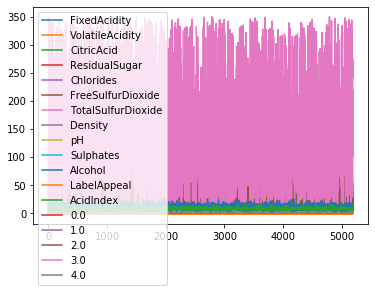

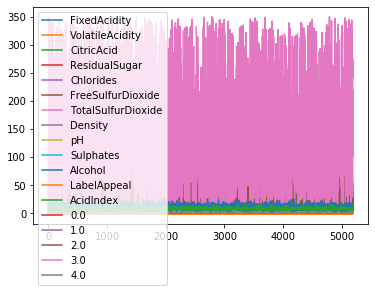

In [364]:
imputknn.plot().get_figure()

In [365]:
index_names = imputknn[~removed_outliers].index # INVERT removed_outliers!!
print(index_names) 

Int64Index([  10,   14,   31,   32,   37,   43,   48,   50,   53,   75,
            ...
            5063, 5075, 5110, 5117, 5121, 5154, 5158, 5175, 5182, 5183],
           dtype='int64', length=486)


### Drop the values where the index names are equivalent to set of index_names created above.

In [366]:
imputknn2 = imputknn.copy()
! pip install plotly
import plotly.graph_objs as go

imputknn2.drop(index_names, inplace=True)

imputknn2

,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,0.0,1.0,2.0,3.0,4.0
0,5.7,0.385,0.04,18.800000,NaN,22.0,115.0,0.99640,2.24,1.830000,6.2,-1.0,6.0,0,1,0,0,0
1,8.0,0.330,NaN,9.400000,0.052568,NaN,108.0,0.99457,3.12,1.770000,13.7,0.0,9.0,0,0,1,0,0
2,11.3,0.320,0.59,2.200000,0.556000,NaN,15.0,0.99940,3.20,1.290000,15.4,0.0,11.0,1,0,0,0,0
3,5.5,NaN,0.39,1.800000,NaN,62.0,180.0,0.94724,3.09,0.750000,12.6,0.0,8.0,0,0,0,0,1
4,7.9,0.600,0.06,50.400000,0.069000,15.0,339.0,0.99640,3.30,0.460000,3.9,1.0,9.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5185,8.4,0.300,0.38,37.100000,0.633000,NaN,220.0,0.99830,2.83,0.250000,9.3,-1.0,8.0,0,0,0,1,0
5186,5.0,NaN,2.01,5.000000,0.043000,17.0,101.0,1.01077,3.39,0.570000,4.9,1.0,5.0,1,0,0,0,0
5187,6.0,0.170,NaN,37.000000,0.078000,25.0,108.0,0.99076,3.25,0.455185,12.3,0.0,6.0,0,0,1,0,0
5188,7.7,0.320,0.12,1.928395,0.029000,26.0,274.0,0.99060,3.97,0.620000,11.0,-1.0,6.0,0,0,1,0,0


## Demonstration: Plot the New Series
### Take an example with FixedAcidity

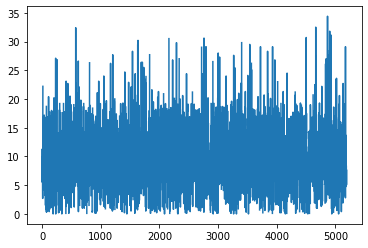

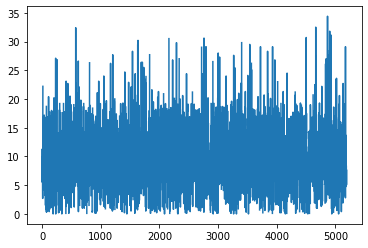

In [367]:
imputknn['FixedAcidity'].plot().get_figure()

### The plot after dropping the outliers:

In [368]:
trace = go.Scatter(
   x = imputknn.index,
   y = imputknn['FixedAcidity'])

go.Figure(data=[trace])

### From data_out and plot, I could see, the outliers really occupy large proportion of data, since I have already elimated lots of data before, If I decide to eliminate the outliers, the data set would be too parse to evaluate, therefore, I decide to subsitute the outliers by medians.


In [384]:
FixedAciditymedian = imputknn['FixedAcidity'].median()
std = imputknn['FixedAcidity'].std()
outliers = (imputknn['FixedAcidity'] - FixedAciditymedian).abs() > std
imputknn[outliers] = np.nan
imputknn['VolatileAcidity'].fillna(FixedAciditymedian, inplace=True)
VolatileAciditymedian = imputknn['VolatileAcidity'].median()
std = imputknn['VolatileAcidity'].std()
outliers = (imputknn['VolatileAcidity'] - VolatileAciditymedian).abs() > std
imputknn[outliers] = np.nan
imputknn['VolatileAcidity'].fillna(VolatileAciditymedian, inplace=True)
CitricAcidmedian = imputknn['CitricAcid'].median()
std = imputknn['CitricAcid'].std()
outliers = (imputknn['CitricAcid'] - CitricAcidmedian).abs() > std
imputknn[outliers] = np.nan
imputknn['CitricAcid'].fillna(CitricAcidmedian, inplace=True)
ResidualSugarmedian = imputknn['ResidualSugar'].median()
std = imputknn['ResidualSugar'].std()
outliers = (imputknn['ResidualSugar'] - ResidualSugarmedian).abs() > std
imputknn[outliers] = np.nan
imputknn['ResidualSugar'].fillna(ResidualSugarmedian, inplace=True)
Chloridesmedian = imputknn['Chlorides'].median()
std = imputknn['Chlorides'].std()
outliers = (imputknn['Chlorides'] - Chloridesmedian).abs() > std
imputknn[outliers] = np.nan
imputknn['Chlorides'].fillna(Chloridesmedian, inplace=True)
FreeSulfurDioxidemedian = imputknn['FreeSulfurDioxide'].median()
std = imputknn['FreeSulfurDioxide'].std()
outliers = (imputknn['FreeSulfurDioxide'] - FreeSulfurDioxidemedian).abs() > std
imputknn[outliers] = np.nan
imputknn['FreeSulfurDioxide'].fillna(FreeSulfurDioxidemedian, inplace=True)
TotalSulfurDioxidemedian = imputknn['TotalSulfurDioxide'].median()
std = imputknn['TotalSulfurDioxide'].std()
outliers = (imputknn['TotalSulfurDioxide'] - TotalSulfurDioxidemedian).abs() > std
imputknn[outliers] = np.nan
imputknn['TotalSulfurDioxide'].fillna(TotalSulfurDioxidemedian, inplace=True)
Densitymedian = imputknn['Density'].median()
std = imputknn['Density'].std()
outliers = (imputknn['Density'] - Densitymedian).abs() > std
imputknn[outliers] = np.nan
imputknn['Density'].fillna(Densitymedian, inplace=True)
pHmedian = imputknn['pH'].median()
std = imputknn['pH'].std()
outliers = (imputknn['pH'] - pHmedian).abs() > std
imputknn[outliers] = np.nan
imputknn['pH'].fillna(pHmedian, inplace=True)
Sulphatesmedian = imputknn['Sulphates'].median()
std = imputknn['Sulphates'].std()
outliers = (imputknn['Sulphates'] - Sulphatesmedian).abs() > std
imputknn[outliers] = np.nan
imputknn['Sulphates'].fillna(Sulphatesmedian, inplace=True)
Alcoholmedian = imputknn['Alcohol'].median()
std = imputknn['Alcohol'].std()
outliers = (imputknn['Alcohol'] - pHmedian).abs() > std
imputknn[outliers] = np.nan
imputknn['Alcohol'].fillna(Alcoholmedian, inplace=True)
LabelAppealmedian = imputknn['LabelAppeal'].median()
std = imputknn['LabelAppeal'].std()
outliers = (imputknn['LabelAppeal'] - LabelAppealmedian).abs() > std
imputknn[outliers] = np.nan
imputknn['LabelAppeal'].fillna(LabelAppealmedian, inplace=True)
AcidIndexmedian = imputknn['AcidIndex'].median()
std = imputknn['AcidIndex'].std()
outliers = (imputknn['AcidIndex'] - AcidIndexmedian).abs() > std
imputknn[outliers] = np.nan
imputknn['AcidIndex'].fillna(AcidIndexmedian, inplace=True)

### To see whether the distribution has been changed, Let's plot the histograms again below:

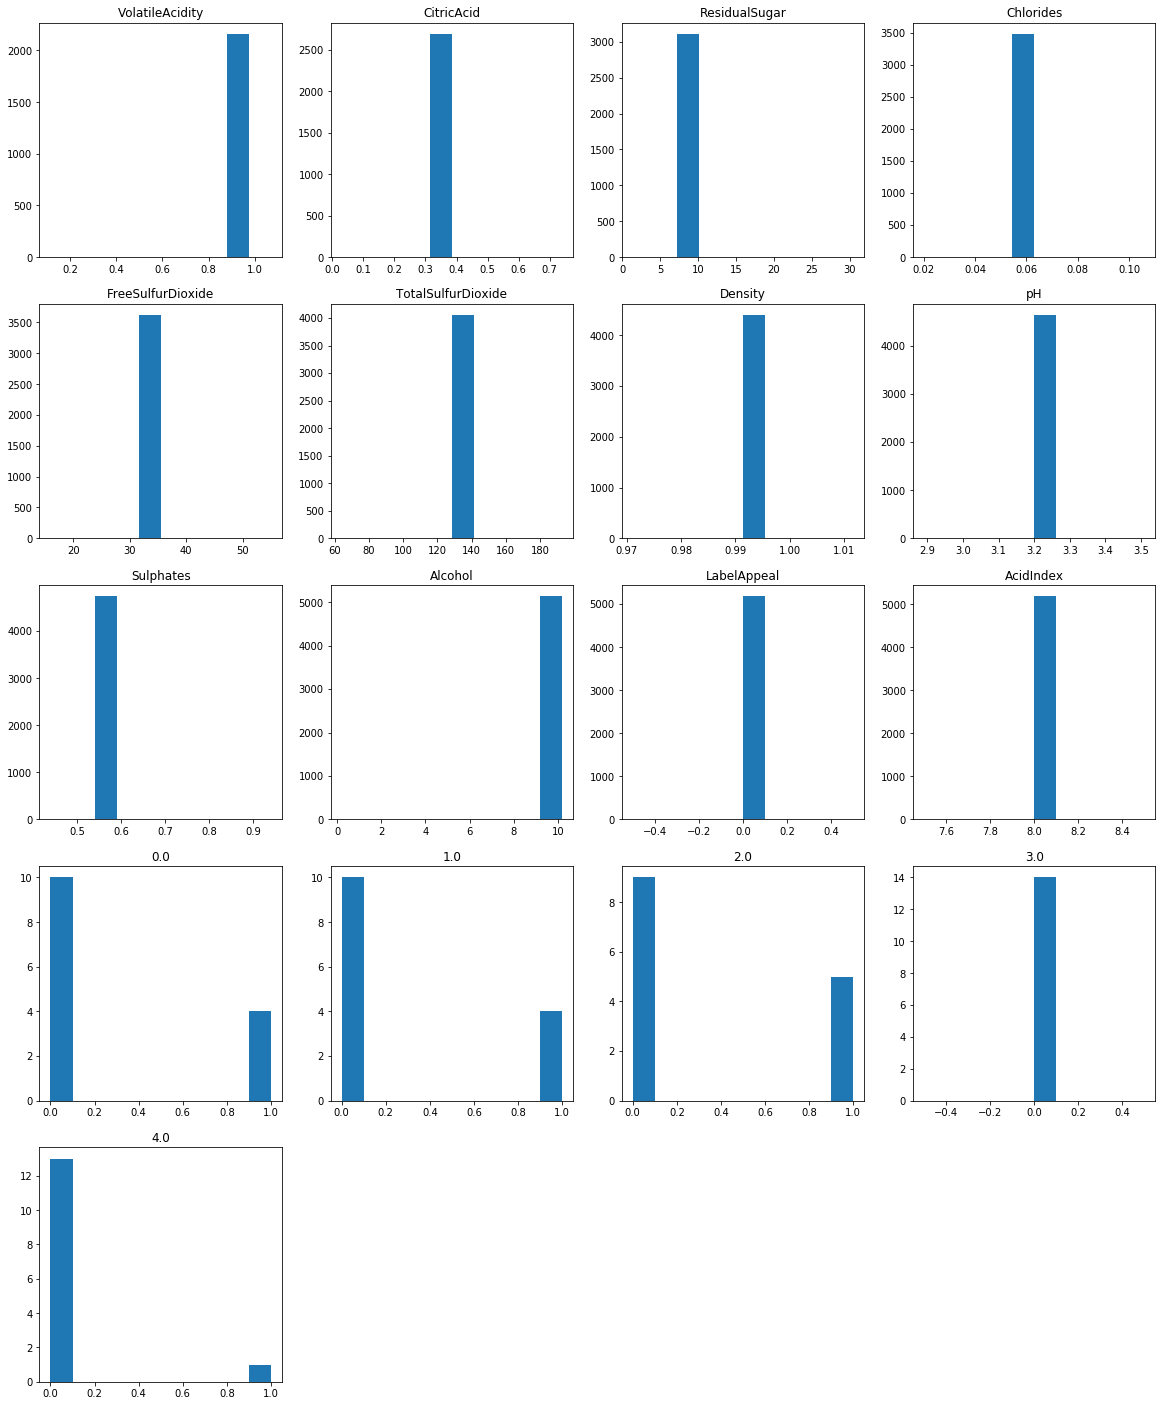

In [385]:
#define a figure to which we will add a histogram for each of our attributes, except for index
plt.figure(figsize=(20,25))

#ignore warnings
np.warnings.filterwarnings('ignore')

#use an index to identify the spot of the subplot
j=1
columns=imputknn.columns.tolist()
for k in columns[1:] :   #for each column in the dataframe except INDEX graph a histogram 
    plt.subplot(5,4,j) 
    plt.hist(imputknn[k])
    plt.title('%s' %k)
    j=j+1 #add 1 to go to the next subplot space

#show results    
plt.show()

### Observations regarding variables: 

- The distributions display that the outliers have been cleaned.

## Transforming skewed data
### Log transformation: Logarithms is an excellent choice for making data less skewed, the default base is usually $e$.

In [387]:
VolatileAcidity = np.log(imputknn.VolatileAcidity)
VolatileAcidity.describe()

count    2174.000000
mean       -0.112453
std         0.099723
min        -2.162823
25%        -0.105361
50%        -0.105361
75%        -0.105361
max         0.067659
Name: VolatileAcidity, dtype: float64

In [388]:
CitricAcid = np.log(imputknn.CitricAcid)
CitricAcid.describe()

count    2702.000000
mean       -0.969308
std         0.066616
min        -3.506558
25%        -0.967584
50%        -0.967584
75%        -0.967584
max        -0.301105
Name: CitricAcid, dtype: float64

In [389]:
ResidualSugar = np.log(imputknn.ResidualSugar)
ResidualSugar.describe()

count    3118.000000
mean        2.079261
std         0.060045
min         0.336472
25%         2.079442
50%         2.079442
75%         2.079442
max         3.417727
Name: ResidualSugar, dtype: float64

In [390]:
Chlorides = np.log(imputknn.Chlorides)
Chlorides.describe()

count    3486.000000
mean       -2.798997
std         0.029727
min        -3.912023
25%        -2.798096
50%        -2.798096
75%        -2.798096
max        -2.244316
Name: Chlorides, dtype: float64

In [391]:
FreeSulfurDioxide = np.log(imputknn.FreeSulfurDioxide)
FreeSulfurDioxide.describe()

count    3628.000000
mean        3.526252
std         0.019149
min         2.772589
25%         3.526361
50%         3.526361
75%         3.526361
max         4.007333
Name: FreeSulfurDioxide, dtype: float64

In [392]:
TotalSulfurDioxide = np.log(imputknn.TotalSulfurDioxide)
TotalSulfurDioxide.describe()

count    4065.000000
mean        4.890582
std         0.017865
min         4.158883
25%         4.890349
50%         4.890349
75%         4.890349
max         5.262690
Name: TotalSulfurDioxide, dtype: float64

In [393]:
Sulphates = np.log(imputknn.Sulphates)
Sulphates.describe()

count    4747.000000
mean       -0.586678
std         0.011604
min        -0.820981
25%        -0.586898
50%        -0.586898
75%        -0.586898
max        -0.061875
Name: Sulphates, dtype: float64

### let's check a little bit using one attribute to see whether the data after cleaning is meaningful by
#### Checking how many of FixedAcidity is under value 6, 7 and 8:

In [413]:
#Check how many values of Fixed Acidity is under 6
data_num = imputknn[['FixedAcidity']]

count_num=[]
count=0
for col in data_num.columns:
    for i in range(len(data_num)):
        if data_num[col][i] < 6:
            count+=1
    count_num.append(count)
    count=0
neg_num_df = pd.DataFrame()
neg_num_df['Column'] = ['FixedAcidity']
neg_num_df['Number of FixedAcidity'] = pd.DataFrame({'Number of FixedAcidity': count_num})
neg_num_df['% of Total'] = round((neg_num_df['Number of FixedAcidity']/len(data_num)),4)*100
neg_num_df

,Column,Number of FixedAcidity,% of Total
0,FixedAcidity,1,0.02


In [414]:
#Check how many values of Fixed Acidity is under 7
data_num = imputknn[['FixedAcidity']]

count_num=[]
count=0
for col in data_num.columns:
    for i in range(len(data_num)):
        if data_num[col][i] < 7:
            count+=1
    count_num.append(count)
    count=0
neg_num_df = pd.DataFrame()
neg_num_df['Column'] = ['FixedAcidity']
neg_num_df['Number of FixedAcidity'] = pd.DataFrame({'Number of FixedAcidity': count_num})
neg_num_df['% of Total'] = round((neg_num_df['Number of FixedAcidity']/len(data_num)),4)*100
neg_num_df

,Column,Number of FixedAcidity,% of Total
0,FixedAcidity,4,0.08


In [415]:
#Check how many values of Fixed Acidity is under 8
data_num = imputknn[['FixedAcidity']]

count_num=[]
count=0
for col in data_num.columns:
    for i in range(len(data_num)):
        if data_num[col][i] < 8:
            count+=1
    count_num.append(count)
    count=0
neg_num_df = pd.DataFrame()
neg_num_df['Column'] = ['FixedAcidity']
neg_num_df['Number of FixedAcidity'] = pd.DataFrame({'Number of FixedAcidity': count_num})
neg_num_df['% of Total'] = round((neg_num_df['Number of FixedAcidity']/len(data_num)),4)*100
neg_num_df

,Column,Number of FixedAcidity,% of Total
0,FixedAcidity,14,0.27


- the number of Fixed Acidity which is under 6: 1
- the number of Fixed Acidity which is under 7: 4
- the number of Fixed Acidity which is under 8: 14

#### The test shows the data after cleaning is meaningful.

## Conclusion
### After cleaning the messy data, the data with 12157 rows have been shrinked to thousands of rows.

### The outliers were substituted with medians, which kept the date less skewed while eliminating the outliers.

### Substiting the negative values by means would give less bias comparing with substituting negative values by absolute values if we are not sure the negative values are mistakes by writing.

### Filling in missing values of STARS with 0 made the missing values of STARS more meaningful, for 0, it could be indicated that those wines are not rated.

### Log transformations made the data less skewed.